In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('insurance_data - insurance_data.csv')

In [4]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
df.shape

(1340, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [7]:
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop(columns= ['index'], inplace= True)

In [10]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [11]:
df= df.set_index(df.PatientID)

In [12]:
df.age.unique()

array([39., 24., nan, 19., 20., 30., 36., 37., 32., 40., 35., 41., 49.,
       48., 45., 34., 18., 42., 50., 23., 58., 29., 21., 52., 43., 47.,
       28., 44., 31., 51., 60., 27., 26., 22., 38., 53., 54., 33., 59.,
       55., 46., 57., 25., 56.])

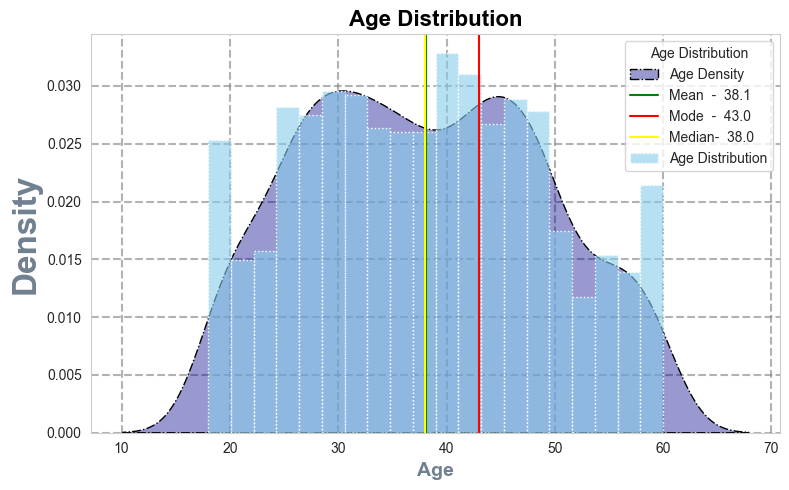

In [13]:
plt.figure(figsize= (8,5))
sns.set_style('whitegrid')
sns.kdeplot(x= df.age, fill= True, linewidth= 1, linestyle= '-.', color= 'darkblue', edgecolor= 'black', alpha=0.4, label= 'Age Density')
sns.histplot(x= df.age, kde= False, stat= 'density', linewidth= 1, linestyle= ':', color= 'skyblue', edgecolor= 'white', alpha= 0.6, bins= 20, label= 'Age Distribution')
plt.axvline(x= df.age.mean(), linewidth= 1.5, linestyle= '-', color= 'green', label= f"{'Mean': <6}- {df.age.mean(): .1f}")
plt.axvline(x= df.age.mode().iloc[0], linewidth= 1.5, linestyle= '-', color= 'red', label= f"{'Mode': <6}- {df.age.mode().iloc[0]: .1f}")
plt.axvline(x= df.age.median(), linewidth= 1.5, linestyle= '-', color= 'yellow', label= f"{'Median': <6}- {df.age.median(): .1f}")

plt.title("Age Distribution", fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel("Age", fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel("Density", fontsize= 24, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.6)
plt.legend(title= 'Age Distribution')
plt.tight_layout()
plt.show()

In [14]:
df.age.fillna(round(df.age.mean(),1), inplace= True)

In [15]:
df.age.unique()

array([39. , 24. , 38.1, 19. , 20. , 30. , 36. , 37. , 32. , 40. , 35. ,
       41. , 49. , 48. , 45. , 34. , 18. , 42. , 50. , 23. , 58. , 29. ,
       21. , 52. , 43. , 47. , 28. , 44. , 31. , 51. , 60. , 27. , 26. ,
       22. , 38. , 53. , 54. , 33. , 59. , 55. , 46. , 57. , 25. , 56. ])

In [16]:
df.age= df.age.astype('int')

In [17]:
df.age.dtype

dtype('int64')

In [18]:
df.isna().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [19]:
df.region.unique()

array(['southeast', 'northwest', nan, 'southwest', 'northeast'],
      dtype=object)

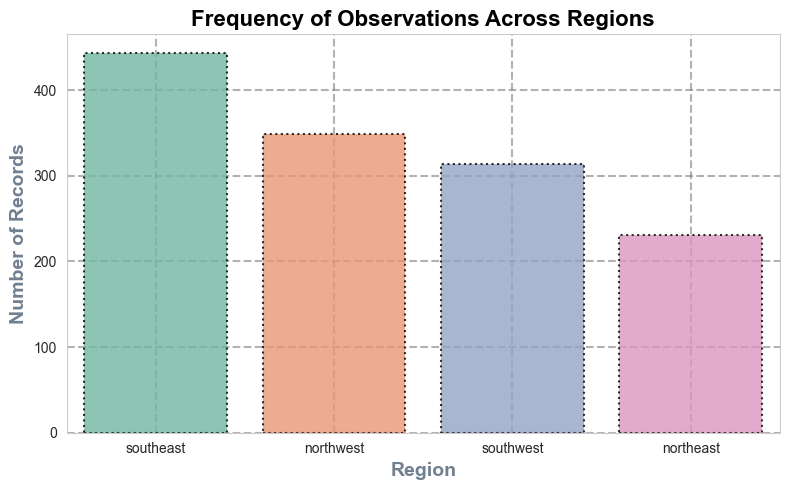

In [20]:
plt.figure(figsize= (8, 5))
sns.set_style('whitegrid')
sns.countplot(x= df.region, linewidth= 1.5, linestyle= ":", palette= 'Set2', edgecolor= 'black', width= 0.8, alpha= 0.8)

plt.title("Frequency of Observations Across Regions", fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel("Region", fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel("Number of Records", fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.tight_layout()
plt.show()

In [21]:
df.region.mode().iloc[0]

'southeast'

In [22]:
df.region.fillna('southeast', inplace= True)

In [23]:
df.isna().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 1 to 1340
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1340 non-null   int64  
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1340 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 115.2+ KB


In [26]:
df.bmi.head()

PatientID
1    23.2
2    30.1
3    33.3
4    33.7
5    34.1
Name: bmi, dtype: float64

In [27]:
df.diabetic.unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df.diabetic= df.diabetic.map({'Yes': True, "No": False}).astype(bool)

In [29]:
df.diabetic.unique()

array([ True, False])

In [30]:
df.diabetic.dtype

dtype('bool')

In [31]:
df.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df.smoker.value_counts()

smoker
No     1066
Yes     274
Name: count, dtype: int64

In [33]:
df.smoker= df.smoker.map({"Yes": True, "No": False}).astype(bool)

In [34]:
df.smoker.value_counts()

smoker
False    1066
True      274
Name: count, dtype: int64

In [35]:
df.claim.head()

PatientID
1    1121.87
2    1131.51
3    1135.94
4    1136.40
5    1137.01
Name: claim, dtype: float64

In [36]:
df.claim.tail()

PatientID
1336    55135.40
1337    58571.07
1338    60021.40
1339    62592.87
1340    63770.43
Name: claim, dtype: float64

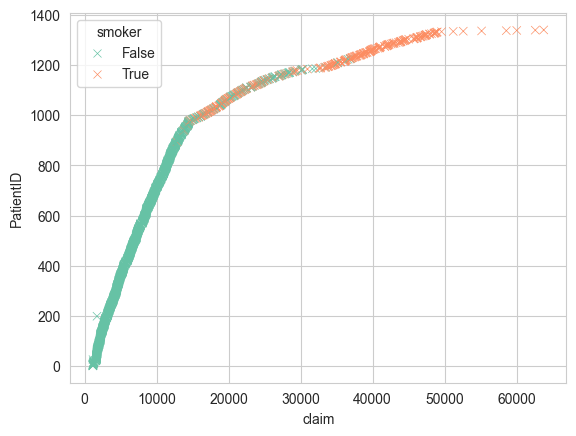

In [37]:
sns.scatterplot(x= df.claim, y= df.index, hue= df.smoker, marker= 'x', palette= 'Set2')
plt.show()

In [38]:
df['claim'].head(1000).is_monotonic_increasing

False

In [39]:
df[df.index.isin([198, 199, 200, 201, 202, 203, 1200])]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,,
198,198,49,male,26.0,98,True,0,False,northeast,3070.81
199,199,25,male,23.0,81,True,0,False,northeast,1704.57
200,200,38,male,23.8,99,True,2,False,northwest,3077.10
201,201,60,female,25.8,100,True,0,False,southwest,3161.45
202,202,59,female,16.8,96,True,1,False,northeast,3167.46
203,203,52,female,33.1,87,False,0,False,southeast,3171.61
1200,1200,30,female,33.1,93,True,0,True,southeast,34439.86


figsize	Shape	Use When <br>
(6, 4)	Small	Quick EDA <br>
(8, 5)	Standard	Most plots <br>
(12, 8)	Large	Presentation-ready or many elements <br>
(16, 10)	Extra Large	Publication/high-detail plots <br>

## Data Analysis

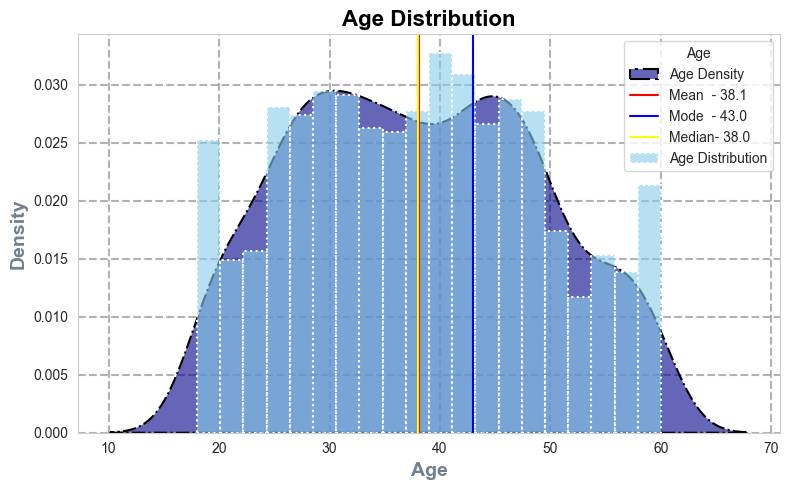

In [40]:
plt.figure(figsize= (8, 5))
sns.set_style('whitegrid')
sns.kdeplot(df.age, fill= True, linewidth= 1.5, linestyle= "-.", color= 'darkblue', edgecolor= 'black', alpha= 0.6, label= 'Age Density')
sns.histplot(df.age, kde= False, stat= "density", linewidth= 1.5, linestyle= ':', color= 'skyblue', edgecolor= 'white', bins= 20, alpha= 0.6, label= 'Age Distribution')
plt.axvline(x= df.age.mean(), linewidth= 1.5, linestyle= '-', color= 'red', label= f"{'Mean':<6}- {df.age.mean():.1f}")
plt.axvline(x= df.age.mode().iloc[0], linewidth= 1.5, linestyle= '-', color= 'blue', label= f"{'Mode':<6}- {df.age.mode().iloc[0]:.1f}")
plt.axvline(x= df.age.median(), linewidth= 1.5, linestyle= '-', color= 'yellow', label= f"{'Median':<6}- {df.age.median():.1f}")

plt.title("Age Distribution", fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel("Age", fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel('Density', fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.6)
plt.legend(title= "Age")
plt.tight_layout()
plt.show()

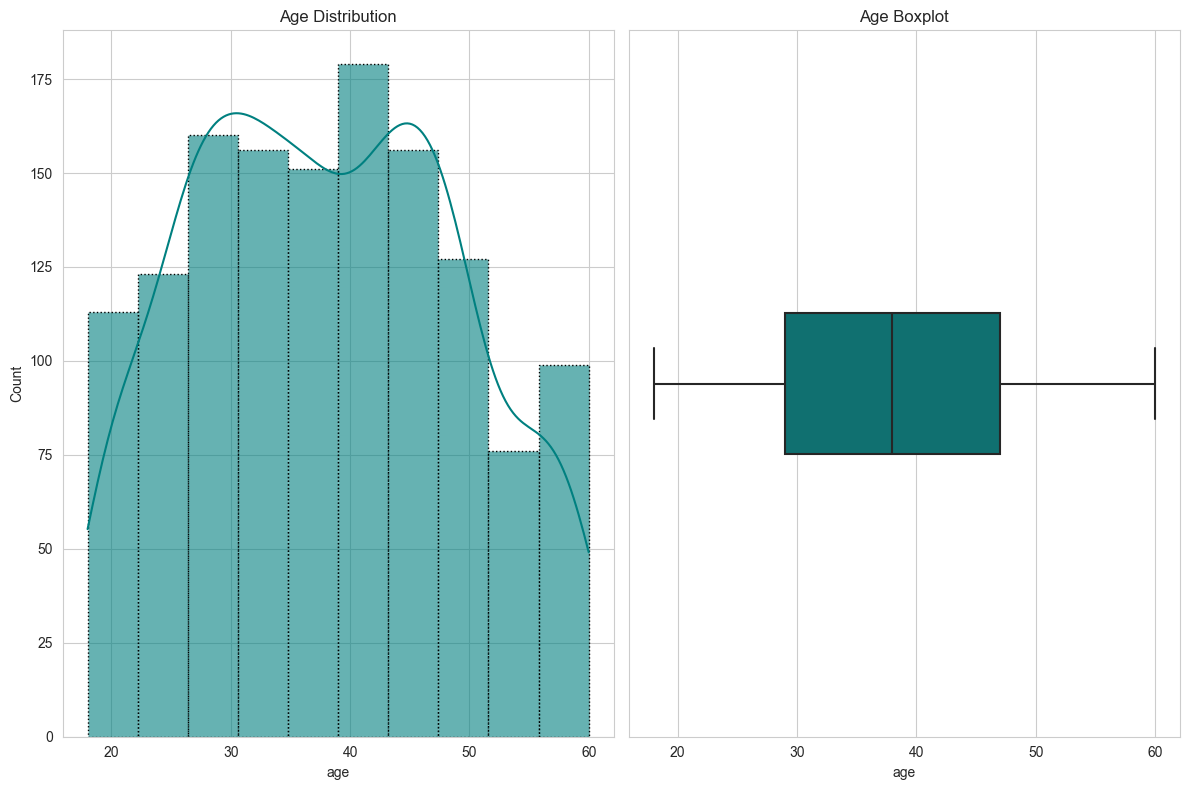

In [41]:
fig, axes= plt.subplots(nrows= 1, ncols= 2, figsize= (12, 8))

sns.histplot(df.age, kde= True, linewidth= 1, linestyle= ":", color= "teal", edgecolor= 'black', bins= 10, alpha= 0.6, ax= axes[0])
axes[0].set_title("Age Distribution")
sns.boxplot(x= df.age, ax= axes[1], color= 'teal', linewidth= 1.5, width= 0.2)
axes[1].set_title('Age Boxplot')

plt.tight_layout()
plt.show()

In [42]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,,
1,1,39,male,23.2,91,True,0,False,southeast,1121.87
2,2,24,male,30.1,87,False,0,False,southeast,1131.51
3,3,38,male,33.3,82,True,0,False,southeast,1135.94
4,4,38,male,33.7,80,False,0,False,northwest,1136.40
5,5,38,male,34.1,100,False,0,False,northwest,1137.01


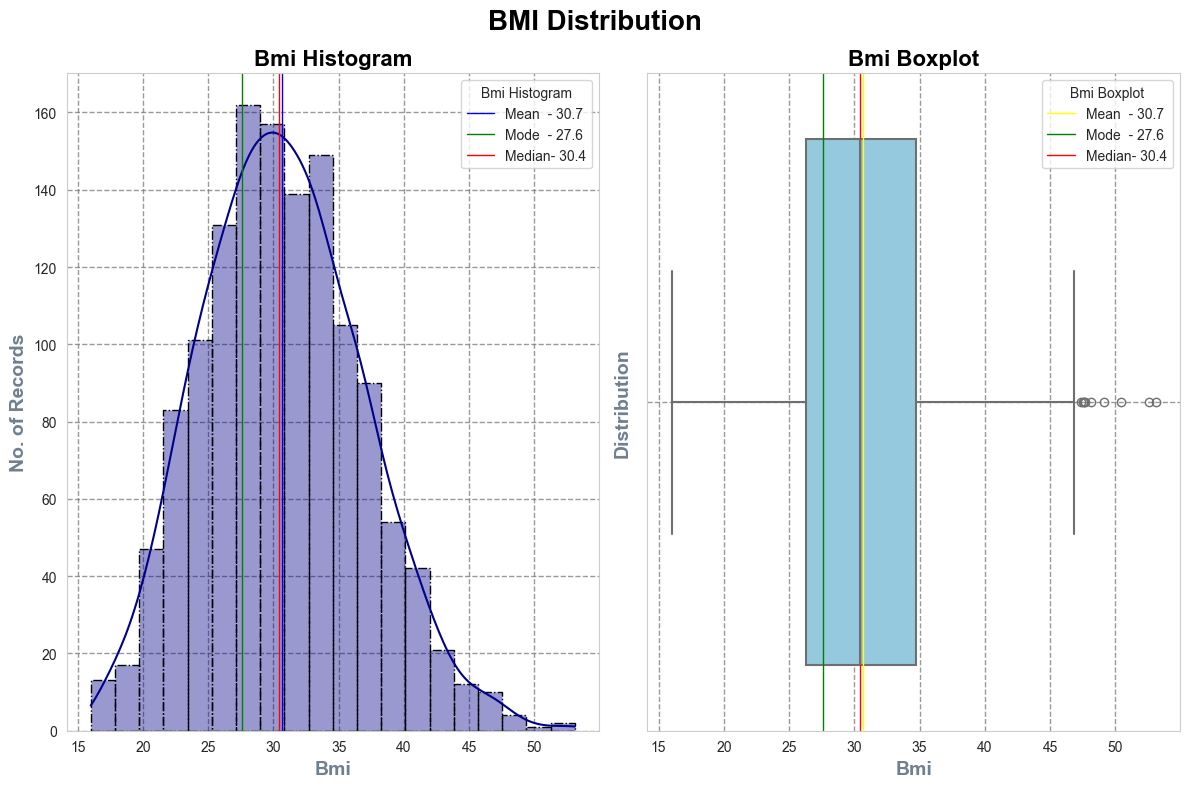

In [43]:
fig, axes= plt.subplots(nrows= 1, ncols= 2, figsize= (12, 8))
sns.set_style('whitegrid')

sns.histplot(df.bmi, kde= True, ax= axes[0], linewidth= 1, linestyle= '-.', color= 'darkblue', edgecolor= 'black', bins= 20, alpha= 0.4)
axes[0].set_title('Bmi Histogram', fontsize= 16, fontweight= 'bold', color= 'black')
axes[0].set_xlabel('Bmi', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[0].set_ylabel('No. of Records', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[0]. axvline(x= df.bmi.mean(), linewidth= 1, linestyle= '-', color= 'blue', label= f"{'Mean': <6}- {df.bmi.mean():.1f}")
axes[0]. axvline(x= df.bmi.mode().iloc[0], linewidth= 1, linestyle= '-', color= 'green', label= f"{'Mode': <6}- {df.bmi.mode().iloc[0]:.1f}")
axes[0]. axvline(x= df.bmi.median(), linewidth= 1, linestyle= '-', color= 'red', label= f"{'Median': <6}- {df.bmi.median():.1f}")
axes[0].legend(title= 'Bmi Histogram')
axes[0].grid(True, linewidth= 1, linestyle= "--", color= 'grey', alpha= 0.8)

sns.boxplot(x= df.bmi, linewidth= 1.5, width= 0.8, color= 'skyblue', ax= axes[1])
axes[1].set_title("Bmi Boxplot", fontsize= 16, fontweight= 'bold', color= 'black')
axes[1].set_xlabel('Bmi', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[1].set_ylabel("Distribution", fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[1].axvline(x= df.bmi.mean(), linewidth= 1, linestyle= '-', color= 'yellow', label= f"{'Mean': <6}- {df.bmi.mean():.1f}")
axes[1].axvline(x= df.bmi.mode().iloc[0], linewidth= 1, linestyle= '-', color= 'green', label= f"{'Mode': <6}- {df.bmi.mode().iloc[0]:.1f}")
axes[1].axvline(x= df.bmi.median(), linewidth= 1, linestyle= '-', color= 'red', label= f"{'Median': <6}- {df.bmi.median():.1f}")
axes[1].legend(title= "Bmi Boxplot")
axes[1].grid(True, linewidth= 1, linestyle= "--", color= 'grey', alpha= 0.8)

fig.suptitle('BMI Distribution', fontsize=20, fontweight='bold', color='black')
plt.tight_layout()
plt.show()

In [44]:
l= df[df.bmi> 50].index.to_list()
l

[10, 142, 1300]

In [45]:
df[df.index.isin([10, 142, 1300])]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,,
10,10,30,male,53.1,97,False,0,False,northwest,1163.46
142,142,46,male,50.4,89,True,1,False,southeast,2438.06
1300,1300,50,male,52.6,110,False,1,True,southeast,44501.40


In [46]:
df.drop(index= l, columns= 'PatientID', inplace= True)

In [47]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,
1,39,male,23.2,91,True,0,False,southeast,1121.87
2,24,male,30.1,87,False,0,False,southeast,1131.51
3,38,male,33.3,82,True,0,False,southeast,1135.94
4,38,male,33.7,80,False,0,False,northwest,1136.40
5,38,male,34.1,100,False,0,False,northwest,1137.01


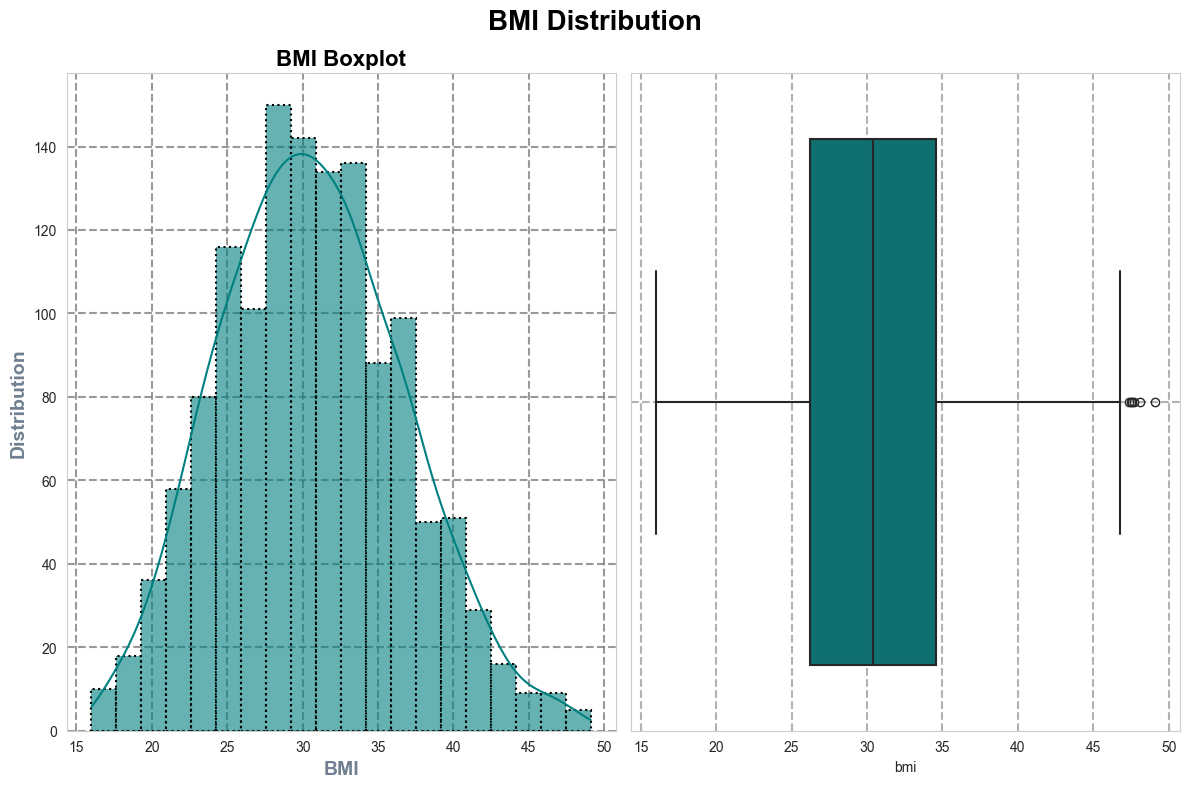

In [48]:
fig, axes= plt.subplots(nrows= 1, ncols= 2, figsize= (12, 8))
sns.set_style('whitegrid')

sns.histplot(x= df.bmi, kde= True, linewidth= 1.5, linestyle= ":", color= 'teal', edgecolor= 'black', bins= 20, ax= axes[0], alpha= 0.6)
axes[0].set_title('BMI Histogram', fontsize= 16, fontweight= 'bold', color= 'black')
axes[0].set_xlabel('BMI', fontsize= 14, fontweight= 'bold', color= 'slateblue')
axes[0].set_ylabel('Number of Records', fontsize= 14, fontweight= 'bold', color= 'slateblue')
axes[0].grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.8)

sns.boxplot(x= df.bmi, ax= axes[1], linewidth= 1.5, width= 0.8, color= "teal")
axes[0].set_title("BMI Boxplot", fontsize= 16, fontweight= 'bold', color= 'black')
axes[0].set_xlabel('BMI', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[0].set_ylabel("Distribution", fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)

plt.suptitle('BMI Distribution', fontsize= 20, fontweight= 'bold', color= 'black')
plt.tight_layout()
plt.show()

In [49]:
df.bloodpressure.head()

PatientID
1     91
2     87
3     82
4     80
5    100
Name: bloodpressure, dtype: int64

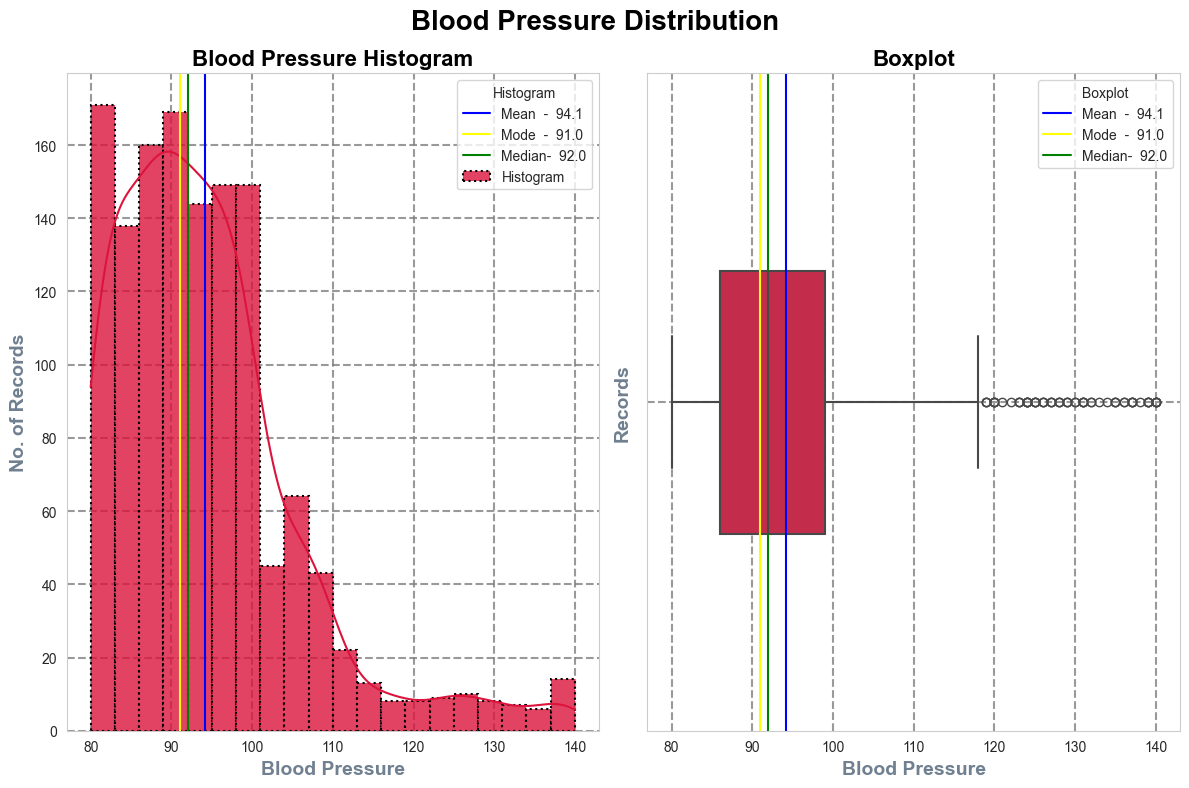

In [50]:
fig, axes= plt.subplots(nrows= 1, ncols= 2, figsize= (12, 8))
sns.set_style('whitegrid')

sns.histplot(df.bloodpressure, ax= axes[0], linewidth= 1.5, linestyle= ":", color= 'crimson', edgecolor= 'black', bins= 20, alpha= 0.8, kde= True, label= 'Histogram')
axes[0].axvline(x= df.bloodpressure.mean(), linewidth= 1.5, linestyle= '-', color= 'blue', label= f"{'Mean': <6}- {df.bloodpressure.mean(): .1f}")
axes[0].axvline(x= df.bloodpressure.mode().iloc[0], linewidth= 1.5, linestyle= '-', color= 'yellow', label= f"{'Mode': <6}- {df.bloodpressure.mode().iloc[0]: .1f}")
axes[0].axvline(x= df.bloodpressure.median(), linewidth= 1.5, linestyle= '-', color= 'green', label= f"{'Median': <6}- {df.bloodpressure.median(): .1f}")
axes[0].set_title("Blood Pressure Histogram", fontsize= 16, fontweight= 'bold', color= 'black')
axes[0].set_xlabel('Blood Pressure', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[0].set_ylabel('No. of Records', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[0].grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.8)
axes[0].legend(title= "Histogram")

sns.boxplot(x= df.bloodpressure, linewidth= 1.5, width= 0.4, color= "crimson", ax= axes[1])
axes[1].axvline(x= df.bloodpressure.mean(), linewidth= 1.5, linestyle= '-', color= 'blue', label= f"{'Mean': <6}- {df.bloodpressure.mean(): .1f}")
axes[1].axvline(x= df.bloodpressure.mode().iloc[0], linewidth= 1.5, linestyle= '-', color= 'yellow', label= f"{'Mode': <6}- {df.bloodpressure.mode().iloc[0]: .1f}")
axes[1].axvline(x= df.bloodpressure.median(), linewidth= 1.5, linestyle= '-', color= 'green', label= f"{'Median': <6}- {df.bloodpressure.median(): .1f}")
axes[1].set_title("Boxplot", fontsize= 16, fontweight= 'bold', color= 'black')
axes[1].set_xlabel('Blood Pressure', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[1].set_ylabel('Records', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[1].grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.8)
axes[1].legend(title= "Boxplot")

plt.suptitle('Blood Pressure Distribution', fontsize= 20, fontweight= 'bold', color= 'black')
plt.tight_layout()
plt.show()

In [51]:
df.gender.value_counts()

gender
male      675
female    662
Name: count, dtype: int64

In [52]:
df.diabetic.value_counts()

diabetic
False    696
True     641
Name: count, dtype: int64

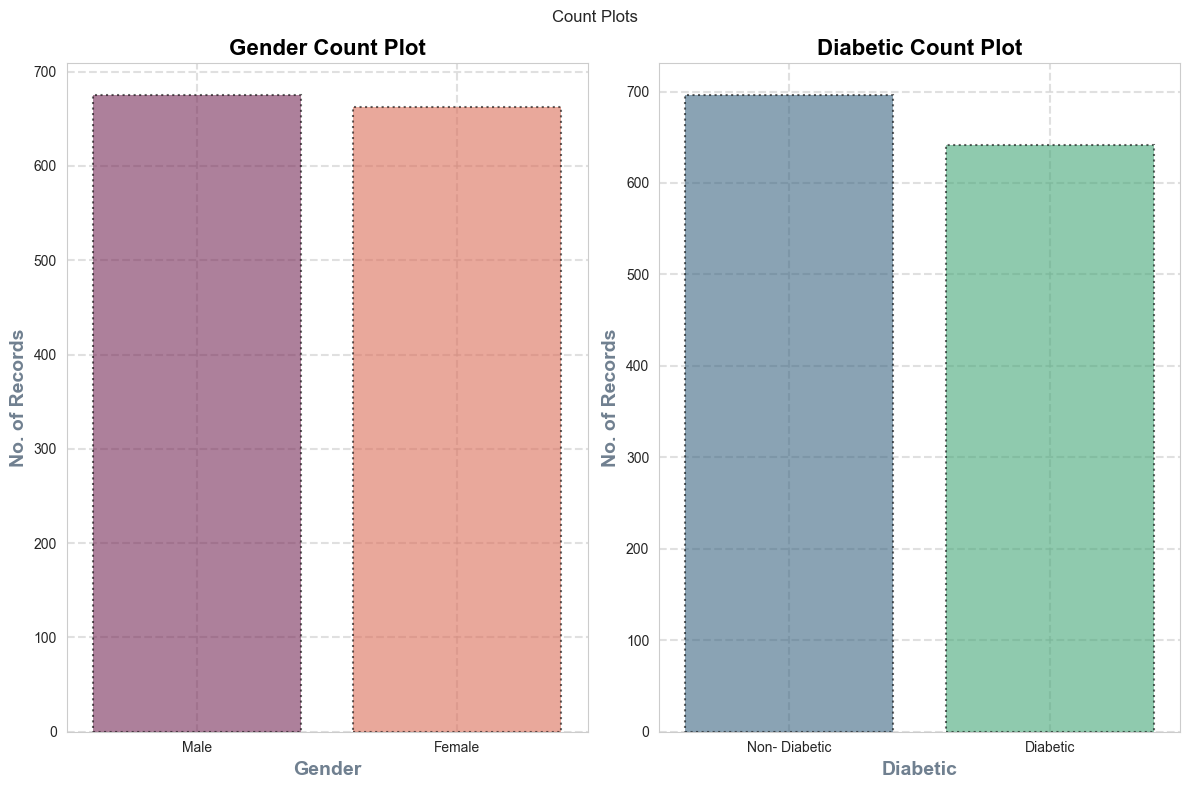

In [53]:
fig, axes= plt.subplots(nrows= 1, ncols= 2, figsize= (12, 8))
sns.set_style('darkgrid')

sns.countplot(x= df.gender, ax= axes[0], linewidth= 1.5, linestyle= ':', palette= 'rocket', edgecolor= 'black', width= 0.8, alpha=0.6)
axes[0].set_xticklabels(["Male", "Female"])
axes[0].set_title("Gender Count Plot", fontsize= 16, fontweight= 'bold', color= 'black')
axes[0].set_xlabel("Gender", fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[0].set_ylabel('No. of Records', fontsize= 14, fontweight= 'bold', color= "slategray")
axes[0].grid(True, linewidth= 1.5, linestyle= '--', alpha= 0.6)

sns.countplot(x= df.diabetic, ax= axes[1], linewidth= 1.5, linestyle= ':', palette= 'viridis', edgecolor= 'black', width= 0.8, alpha=0.6)
axes[1].set_xticklabels(['Non- Diabetic', "Diabetic"])
axes[1].set_title("Diabetic Count Plot", fontsize= 16, fontweight= 'bold', color= 'black')
axes[1].set_xlabel("Diabetic", fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[1].set_ylabel('No. of Records', fontsize= 14, fontweight= 'bold', color= "slategray")
axes[1].grid(True, linewidth= 1.5, linestyle= '--', alpha= 0.6)

plt.suptitle('Count Plots')
plt.tight_layout()
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 1 to 1340
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1337 non-null   int64  
 1   gender         1337 non-null   object 
 2   bmi            1337 non-null   float64
 3   bloodpressure  1337 non-null   int64  
 4   diabetic       1337 non-null   bool   
 5   children       1337 non-null   int64  
 6   smoker         1337 non-null   bool   
 7   region         1337 non-null   object 
 8   claim          1337 non-null   float64
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 86.2+ KB


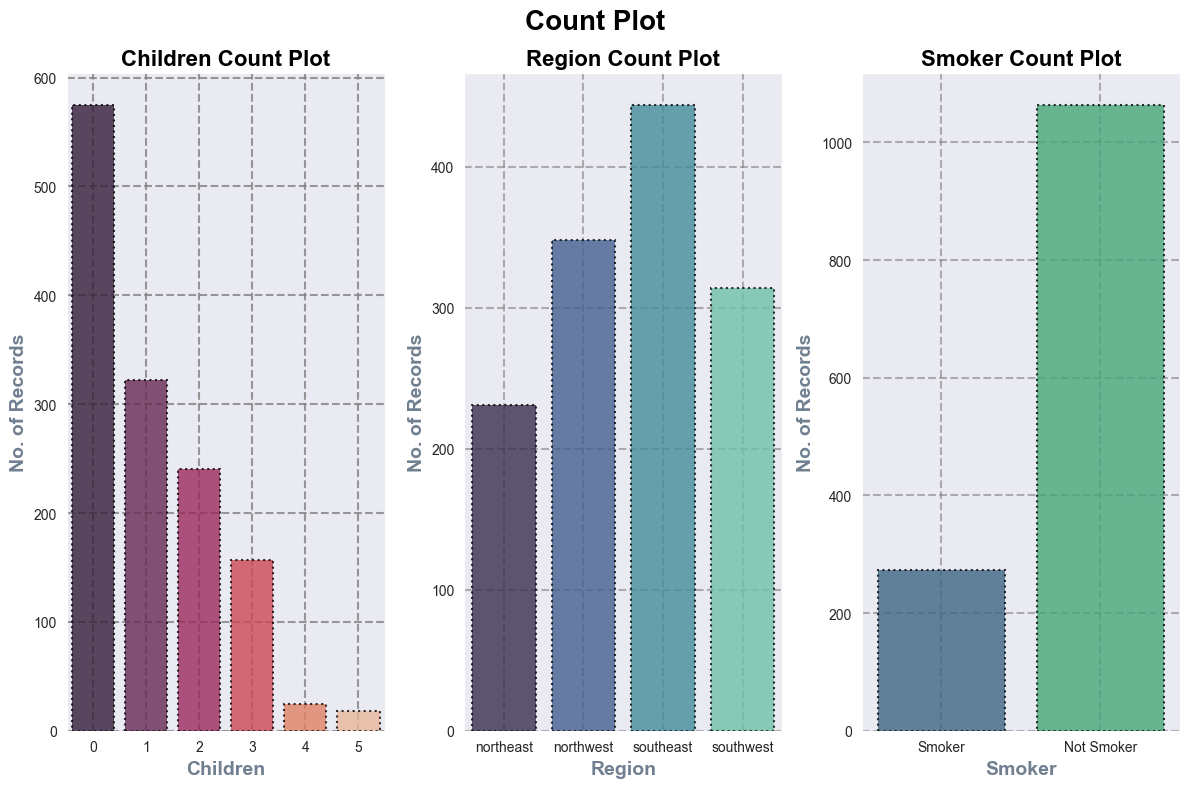

In [55]:
fig, axes= plt.subplots(nrows= 1, ncols= 3, figsize= (12, 8))
sns.set_style('whitegrid')

sns.countplot(x= df.children, ax= axes[0], order= sorted(df.children.unique()), linewidth= 1.5, linestyle= ":", palette= 'rocket', edgecolor= 'black', width= 0.8, alpha= 0.8)
axes[0].set_title('Children Count Plot', fontsize= 16, fontweight= 'bold', color= 'black')
axes[0].set_xlabel('Children', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[0].set_ylabel('No. of Records', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[0].grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.8)

sns.countplot(x= df.region, ax= axes[1], order= sorted(df.region.unique()), linewidth= 1.5, linestyle= ':', palette= 'mako', edgecolor= 'black', width= 0.8, alpha= 0.8)
axes[1].set_title('Region Count Plot', fontsize= 16, fontweight= 'bold', color= 'black')
axes[1].set_xlabel('Region', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[1].set_ylabel('No. of Records', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[1].grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.6)

sns.countplot(x= df.smoker, ax= axes[2], order= [True, False], linewidth= 1.5, linestyle= ':', palette= 'viridis', edgecolor= 'black', width= 0.8, alpha= 0.8)
axes[2].set_xticklabels(['Smoker', 'Not Smoker'])
axes[2].set_title('Smoker Count Plot', fontsize= 16, fontweight= 'bold', color= 'black')
axes[2].set_xlabel('Smoker', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[2].set_ylabel('No. of Records', fontsize= 14, fontweight= 'bold', color= 'slategray')
axes[2].grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.6)

plt.suptitle("Count Plot", fontsize= 20, fontweight= 'bold', color= 'black')
plt.tight_layout()
plt.show()

In [56]:
df.smoker.value_counts()

smoker
False    1064
True      273
Name: count, dtype: int64

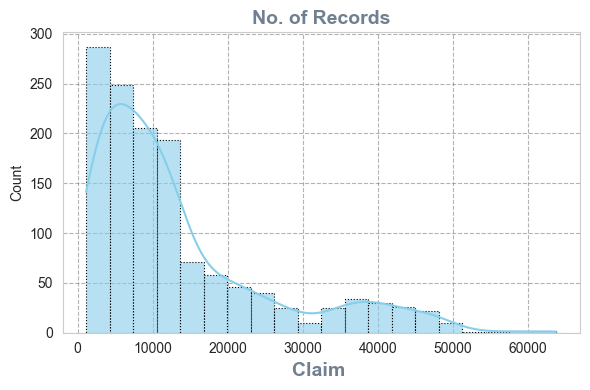

In [57]:
plt.figure(figsize= (6, 4))
sns.set_style('whitegrid')
sns.histplot(x= df.claim, kde= True, linewidth= 0.8, linestyle= ":", color= 'skyblue', edgecolor= 'black', bins= 20, alpha= 0.6)

plt.title('Claim Distribution', fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Claim ', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.title('No. of Records', fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 0.8, linestyle= '--', color= 'grey', alpha= 0.6)
plt.tight_layout()
plt.show()

## What is the distribution of BMI among different age groups and regions?

In [58]:
df.bmi.unique()

array([23.2, 30.1, 33.3, 33.7, 34.1, 34.4, 37.3, 41.1, 43. , 19.8, 20.3,
       20.7, 27.6, 28.7, 30.4, 35.4, 31.1, 35.5, 36.9, 20.8, 26.7, 17.5,
       31.4, 20.4, 21.8, 22.6, 38.2, 38.3, 25.2, 25.6, 39.2, 39.8, 40.3,
       27.8, 30.6, 26.8, 33.8, 39.5, 16. , 21.5, 23. , 23.1, 23.8, 25.5,
       26.1, 23.3, 28.5, 29.4, 30. , 35.2, 17.8, 18.6, 20.6, 24.7, 28.9,
       29.8, 32.9, 40.5, 29.7, 26.5, 32.6, 20.9, 24.6, 41.9, 28.4, 29.6,
       31.5, 33. , 29. , 31.3, 22. , 27.9, 23.4, 25.8, 29.3, 32. , 35.9,
       34.6, 34.9, 32.1, 26. , 22.3, 27.4, 22.5, 30.5, 36.6, 25.7, 37.4,
       24.3, 27.1, 28.1, 28.8, 36. , 25.1, 26.3, 28.2, 24.1, 30.3, 31.9,
       33.2, 35.6, 40.2, 31.7, 26.2, 23.7, 32.4, 24.5, 35.7, 27.7, 34. ,
       32.7, 20.2, 17.4, 22.1, 26.4, 28.3, 17.7, 38.1, 31.8, 39.6, 24.2,
       29.9, 27.2, 29.5, 29.2, 46.5, 34.5, 25.3, 26.6, 30.9, 16.8, 33.1,
       33.4, 22.2, 21.9, 23.5, 28.6, 42.1, 37.1, 33.9, 25.9, 38.7, 42.4,
       34.8, 38.9, 32.5, 39.3, 33.6, 45.9, 17.3, 29

In [59]:
df.age.unique()

array([39, 24, 38, 19, 20, 36, 37, 32, 40, 35, 41, 49, 48, 45, 34, 18, 42,
       50, 23, 30, 58, 29, 21, 52, 43, 47, 28, 44, 31, 51, 60, 27, 26, 22,
       53, 54, 33, 59, 55, 57, 46, 25, 56])

In [60]:
df.age.min()

np.int64(18)

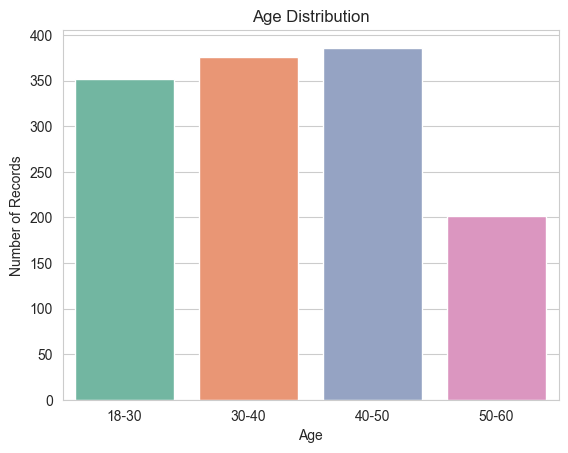

In [61]:
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '30-40', '40-50', '50-60']
df['age_categorized'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest= True, right= False)

sns.countplot(data=df, x='age_categorized', order=labels, palette='Set2')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Records')
plt.show()

In [62]:
print(f'min: {df.bmi.min()}\nmax: {df.bmi.max()}') 

min: 16.0
max: 49.1


In [63]:
def bmigroup(x):
    if x>= 16 and x<= 29:
        return "16-29"
    elif x>= 30 and x<= 39:
        return "30-39"
    else:
        return '40-50'

df['bmi_categorized']= df['bmi'].apply(bmigroup)

In [64]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_categorized,bmi_categorized
PatientID,,,,,,,,,,,
1,39,male,23.2,91,True,0,False,southeast,1121.87,30-40,16-29
2,24,male,30.1,87,False,0,False,southeast,1131.51,18-30,30-39
3,38,male,33.3,82,True,0,False,southeast,1135.94,30-40,30-39
4,38,male,33.7,80,False,0,False,northwest,1136.40,30-40,30-39
5,38,male,34.1,100,False,0,False,northwest,1137.01,30-40,30-39


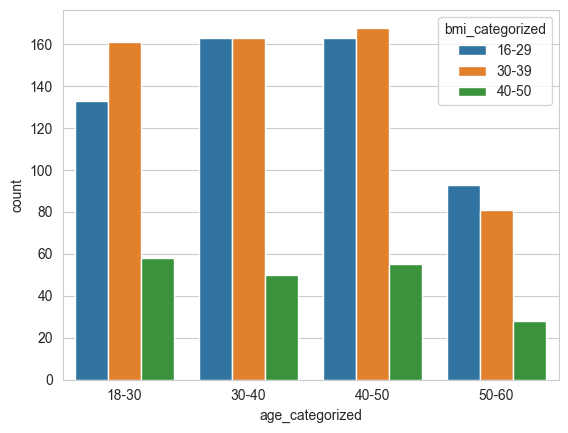

In [65]:
sns.countplot(x= df.age_categorized, hue= df.bmi_categorized)
plt.show()

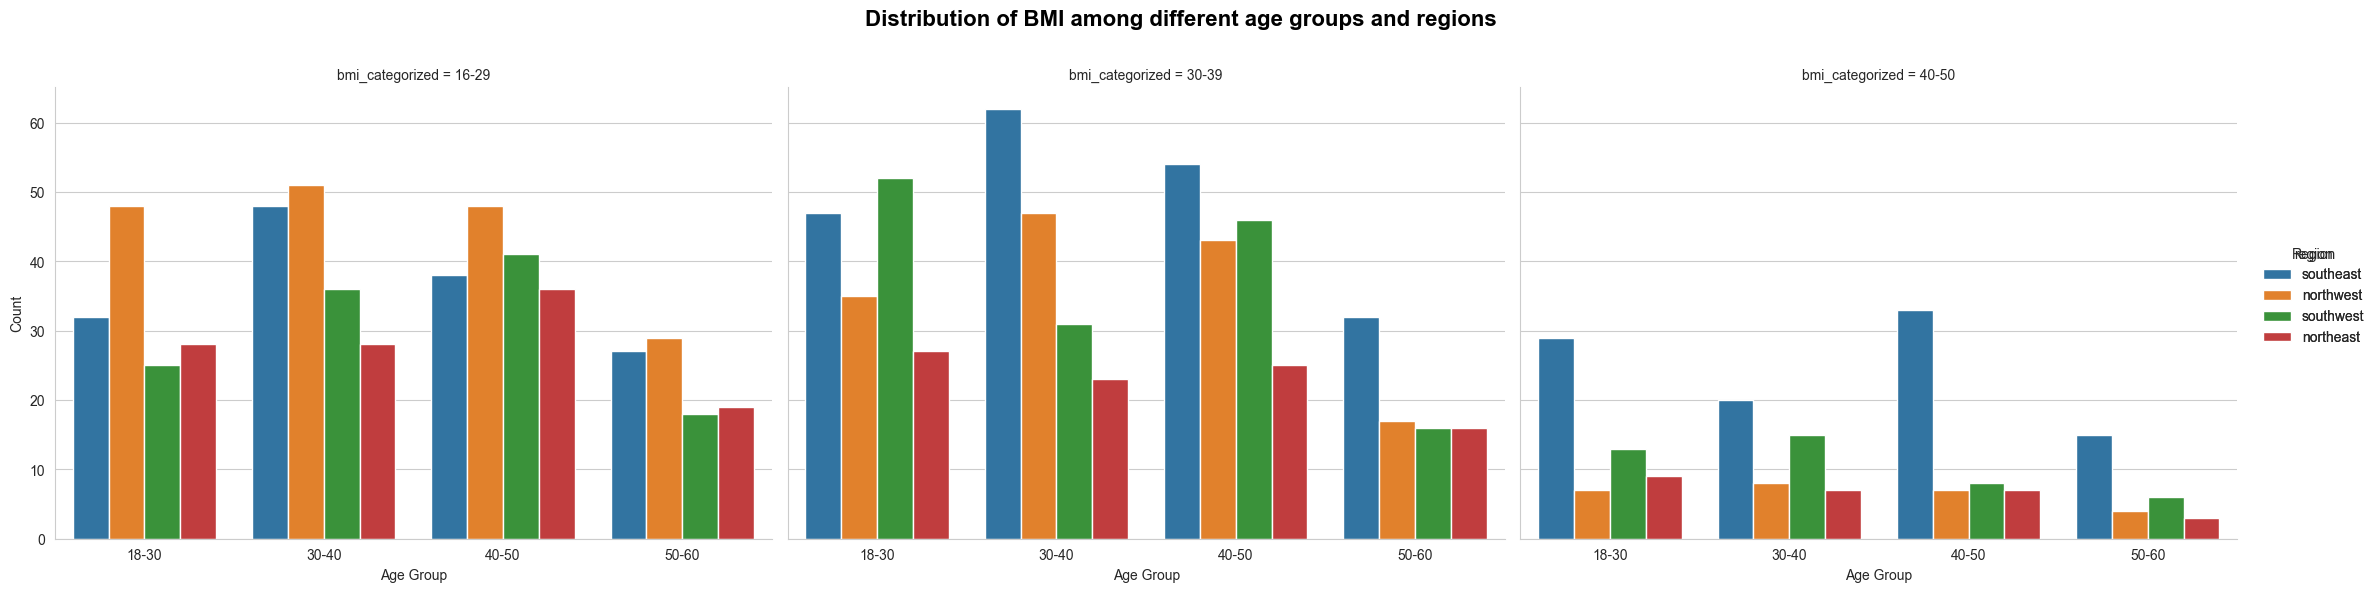

In [66]:
sns.set_style('whitegrid')
g = sns.catplot(data=df, kind='count', x='age_categorized', hue='region', col='bmi_categorized', height=6, aspect=1.2)

# Set titles and labels using FacetGrid methods
g.fig.subplots_adjust(top=0.85)  # adjust top spacing for suptitle
g.fig.suptitle('Distribution of BMI among different age groups and regions', fontsize=16, fontweight='bold', color='black')

g.set_axis_labels('Age Group', 'Count')
g.set_xlabels('Age Group')
g.set_ylabels('Count')

# Customize legend
g.add_legend(title= 'Region')

plt.show()


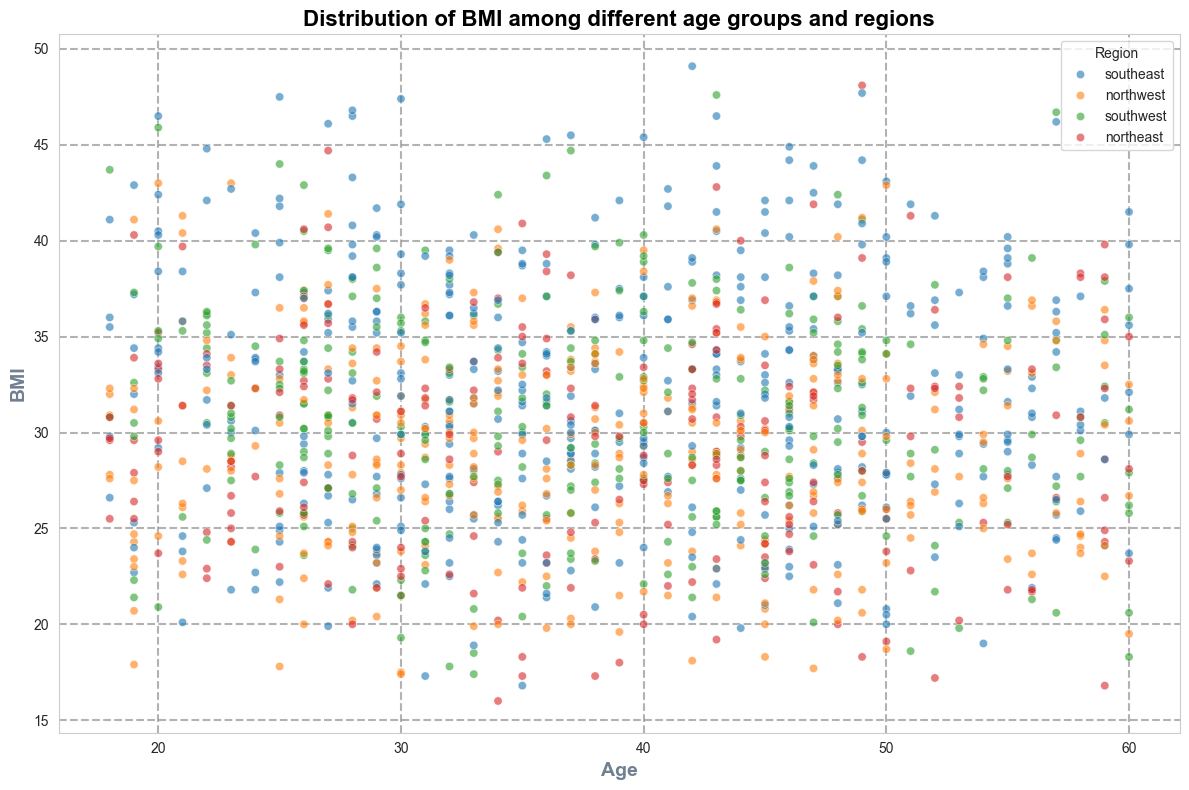

In [67]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.scatterplot(data=df, x='age', y='bmi', hue='region', alpha=0.6)

plt.title('Distribution of BMI among different age groups and regions', fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Age', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel("BMI", fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.legend(title= 'Region')
plt.tight_layout()
plt.show()

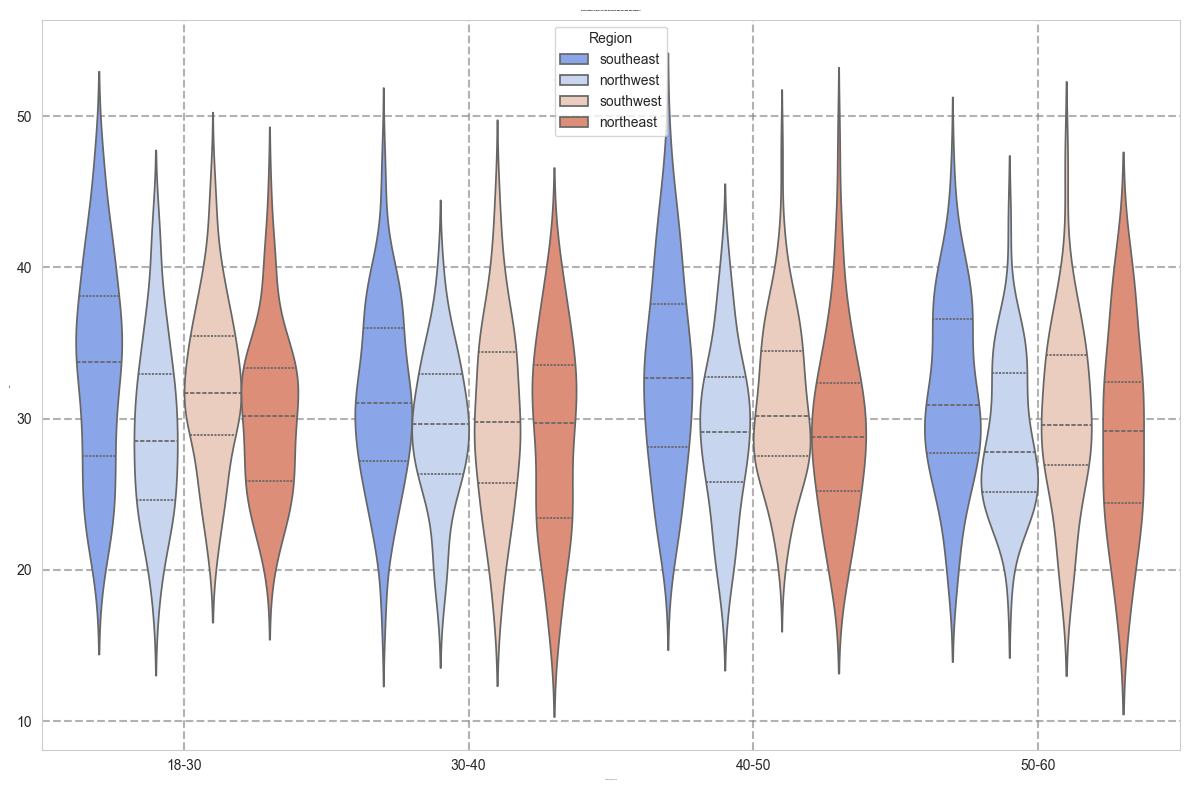

In [68]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.violinplot(x= df.age_categorized, y= df.bmi, inner= 'quart', hue= df.region, palette= 'coolwarm')

plt.title('Distribution of BMI among different age groups and regions', fontsize= 1.5, fontweight= 'bold', color= 'black')
plt.xlabel('Age Groups', fontsize= 1.5, fontweight= 'bold', color= 'slategray')
plt.ylabel('BMI', fontsize= 1.5, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.6)
plt.legend(title= "Region")
plt.tight_layout()
plt.show()

## Find average age of diabetic people across different regions?

In [69]:
df.diabetic.unique()

array([ True, False])

In [70]:
df.diabetic.value_counts()

diabetic
False    696
True     641
Name: count, dtype: int64

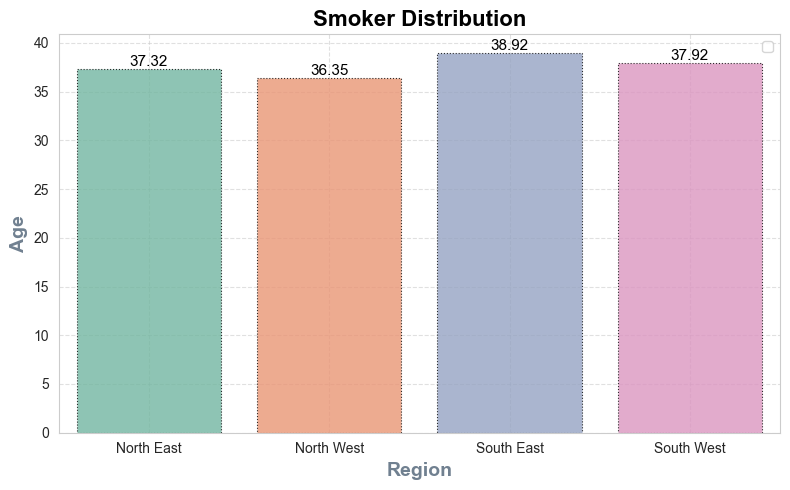

In [71]:
plt.figure(figsize= (8, 5))
sns.set_style('whitegrid')
ax= sns.barplot(x= 'region', y= 'age', data= df[df.diabetic== True], ci= None,order= ['northeast', 'northwest', 'southeast', 'southwest'], 
            linewidth= 0.8, linestyle= ":", palette= 'Set2', edgecolor= "black", width= 0.8, alpha= 0.8)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Smoker Distribution', fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Region', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel('Age', fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 0.8, linestyle= "--", alpha= 0.6)
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=['North East', 'North West', 'South East', 'South West']
)
plt.legend()
plt.tight_layout()
plt.show()

## Is there a correlation between blood pressure levels and BMI for patients with and without diabetes?

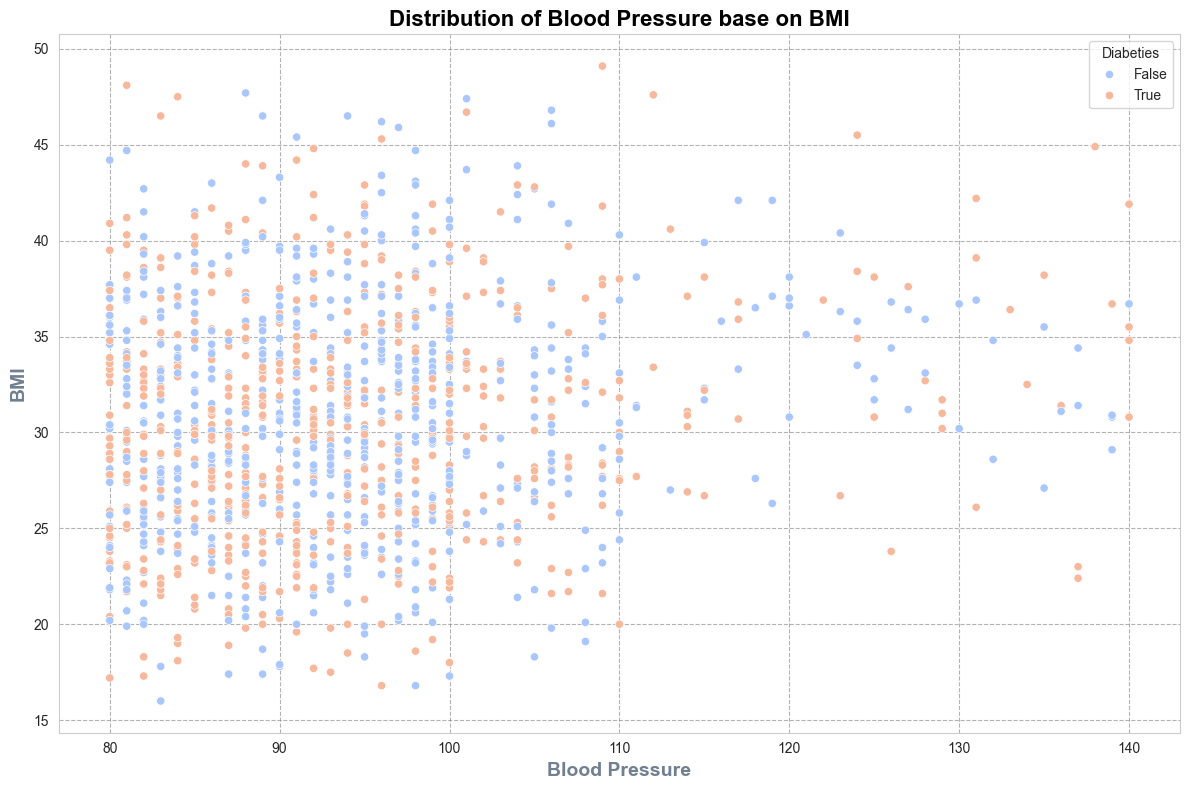

In [72]:
plt.figure(figsize= (12, 8))
sns.set_style('whitegrid')
sns.scatterplot(x= df.bloodpressure,y=  df.bmi, hue= df.diabetic, palette= 'coolwarm')

plt.title('Distribution of Blood Pressure base on BMI', fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Blood Pressure', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel('BMI', fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 0.8, linestyle= '--', color= 'grey', alpha= 0.6)
plt.legend(title= 'Diabeties')
plt.tight_layout()
plt.show()
plt.show()

## How does the number of children in a family impact the likelihood of having a diabetic condition?

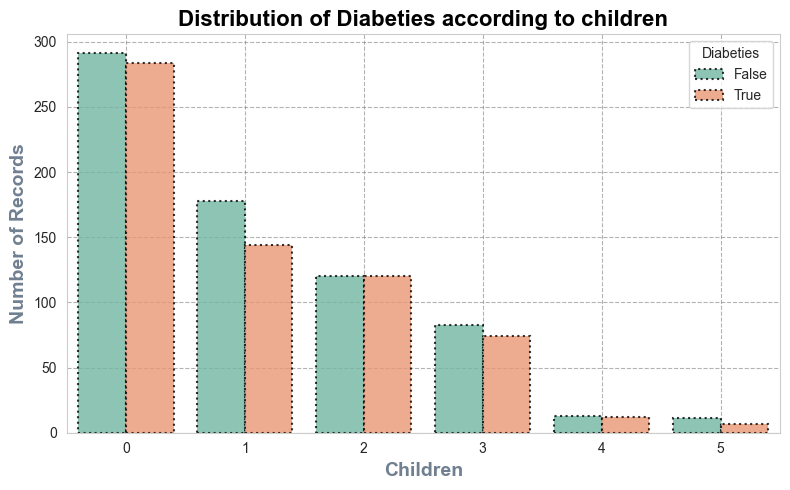

In [73]:
plt.figure(figsize= (8, 5))
sns.set_style('whitegrid')
sns.countplot(x= df.children, hue= df.diabetic, linewidth= 1.5, linestyle= ':', palette= 'Set2', edgecolor= "black", width= 0.8, alpha= 0.8)

plt.title('Distribution of Diabeties according to children', fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Children', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel('Number of Records', fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 0.8, linestyle= '--', color= 'grey', alpha= 0.6)
plt.legend(title= 'Diabeties')
plt.tight_layout()
plt.show()

## What is the average insurance claim amount for different age groups and genders?

In [74]:
avg_claim_by_age= df.groupby('age_categorized')['claim'].mean()
avg_claim_by_age

age_categorized
18-30    13950.546392
30-40    12901.044362
40-50    13170.377306
50-60    12815.027822
Name: claim, dtype: float64

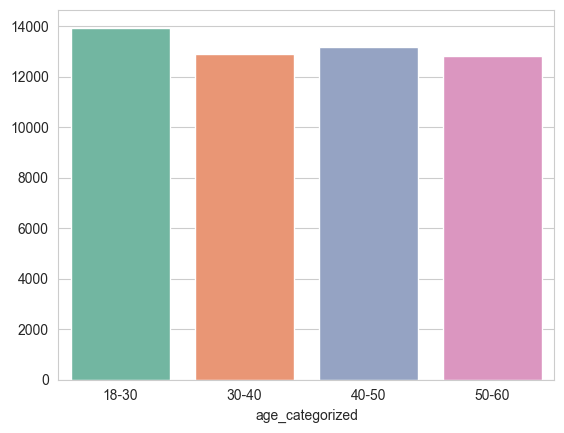

In [75]:
sns.barplot(x= avg_claim_by_age.index, y= avg_claim_by_age.values, palette= "Set2")
plt.show()

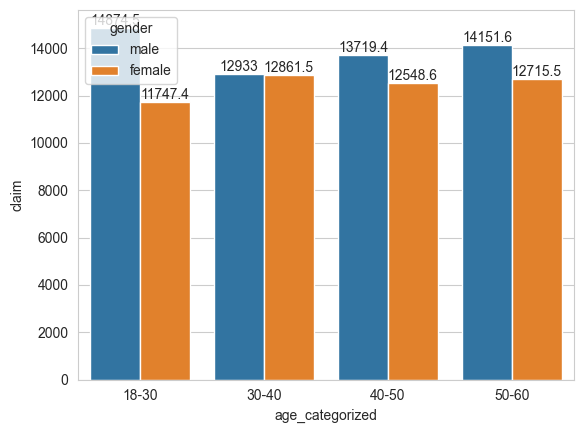

In [76]:
ax= sns.barplot(x='age_categorized', y='claim', hue='gender', data=df, ci= None)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [77]:
df[(df.age_categorized== '50-60') & (df.gender== 'male')]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_categorized,bmi_categorized
PatientID,,,,,,,,,,,
59,50,male,30.0,88,False,1,False,southeast,1720.35,50-60,30-39
75,50,male,24.6,90,False,1,False,southwest,1837.24,50-60,16-29
100,50,male,26.0,82,False,0,False,northeast,2102.26,50-60,16-29
561,50,male,26.1,96,True,2,False,southeast,7729.65,50-60,16-29
568,50,male,40.2,91,True,0,False,southeast,7804.16,50-60,40-50
651,50,male,37.1,96,False,1,False,southeast,9048.03,50-60,30-39
661,50,male,25.5,86,True,2,False,northeast,9225.26,50-60,16-29
688,50,male,29.8,86,True,3,False,northwest,9620.33,50-60,40-50
855,50,male,25.5,87,False,0,False,northwest,12124.99,50-60,16-29


In [78]:
df[(df.age>= 50) & (df.gender== 'male')]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_categorized,bmi_categorized
PatientID,,,,,,,,,,,
59,50,male,30.0,88,False,1,False,southeast,1720.35,50-60,30-39
75,50,male,24.6,90,False,1,False,southwest,1837.24,50-60,16-29
100,50,male,26.0,82,False,0,False,northeast,2102.26,50-60,16-29
561,50,male,26.1,96,True,2,False,southeast,7729.65,50-60,16-29
568,50,male,40.2,91,True,0,False,southeast,7804.16,50-60,40-50
651,50,male,37.1,96,False,1,False,southeast,9048.03,50-60,30-39
661,50,male,25.5,86,True,2,False,northeast,9225.26,50-60,16-29
688,50,male,29.8,86,True,3,False,northwest,9620.33,50-60,40-50
855,50,male,25.5,87,False,0,False,northwest,12124.99,50-60,16-29


## Can we identify any specific trends in insurance claims based on smoking habits and regions?

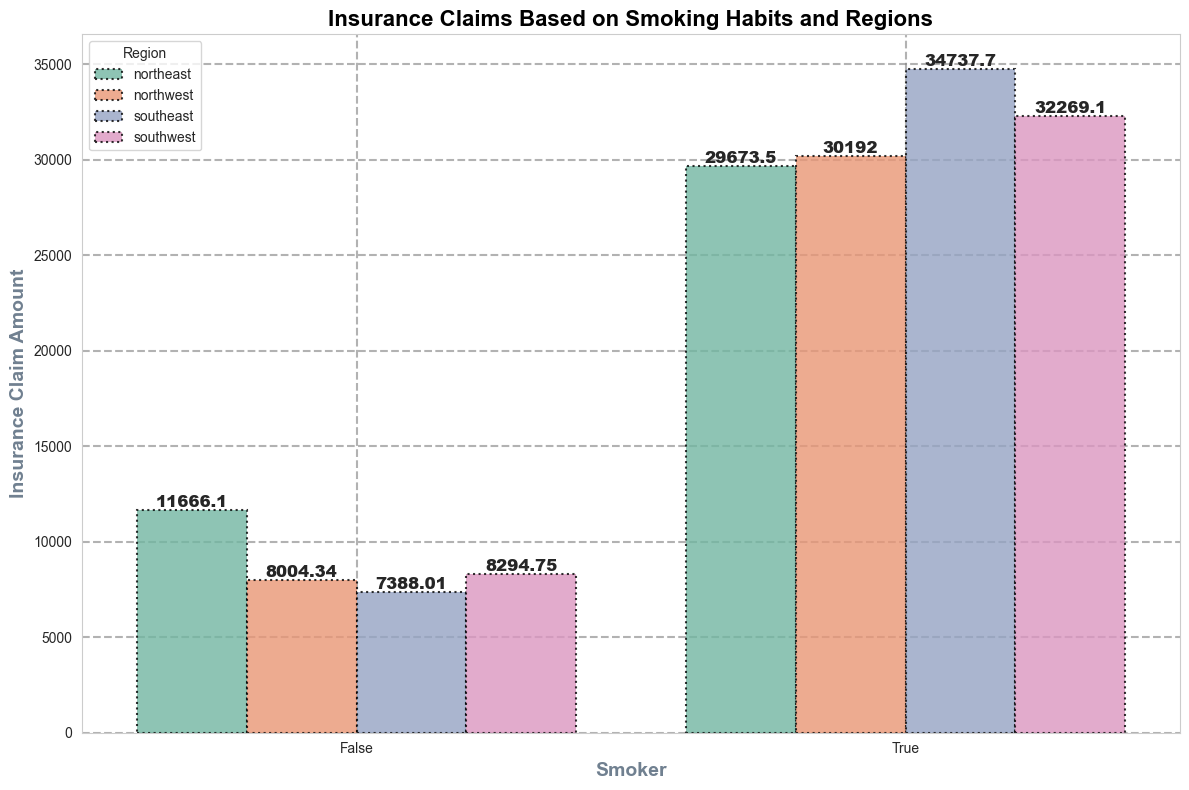

In [79]:
plt.figure(figsize= (12, 8))
ax= sns.barplot(x= df.smoker, y= df.claim, hue= df.region, ci= False, hue_order= ['northeast', 'northwest', 'southeast', 'southwest'],
               linewidth= 1.5, linestyle= ":", palette= 'Set2', edgecolor= 'black', width= 0.8, alpha= 0.8)
for label in ax.containers:
    ax.bar_label(label, fontsize= 12, fontweight= 'black')

plt.title('Insurance Claims Based on Smoking Habits and Regions', fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel('Smoker', fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel('Insurance Claim Amount', fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.legend(title= "Region")
plt.tight_layout()
plt.show()